In [100]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [101]:
data = pd.read_csv("data_lulus_tepat_waktu.csv")

#### ip1: GPA from semester 1
#### ip2: GPA from semester 2
#### ip3: GPA from semester 3
#### ip4: GPA from semester 4

In [102]:
data.head()

,ip1,ip2,ip3,ip4,tepat
0,2.30,1.97,1.80,1.56,Tidak
1,1.81,1.68,1.57,1.86,Tidak
2,3.07,3.00,2.75,3.21,Tidak
3,2.71,2.33,2.61,1.98,Tidak
4,3.17,3.02,3.28,2.96,Tidak


In [103]:
data.isna().sum()

ip1      0
ip2      0
ip3      0
ip4      0
tepat    0
dtype: int64

In [104]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [105]:
data["tepat"] = le.fit_transform(data["tepat"])

In [106]:
data.head(20)

,ip1,ip2,ip3,ip4,tepat
0,2.30,1.97,1.80,1.56,0
1,1.81,1.68,1.57,1.86,0
2,3.07,3.00,2.75,3.21,0
3,2.71,2.33,2.61,1.98,0
4,3.17,3.02,3.28,2.96,0
5,3.16,3.45,3.02,3.06,0
6,2.72,2.50,2.92,3.00,0
7,2.97,3.27,2.90,2.83,0
8,2.72,2.61,2.64,2.46,0
9,2.78,2.85,3.08,3.35,0


In [107]:
X = data.iloc[:,:-1]
Y = data.iloc[:,-1:]

<AxesSubplot:xlabel='tepat', ylabel='count'>

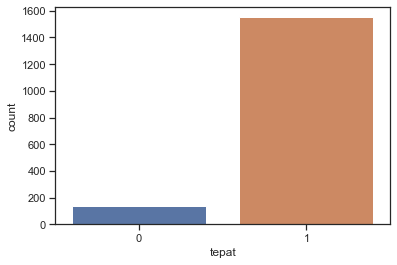

In [108]:
sns.countplot(x = data["tepat"], data = data)

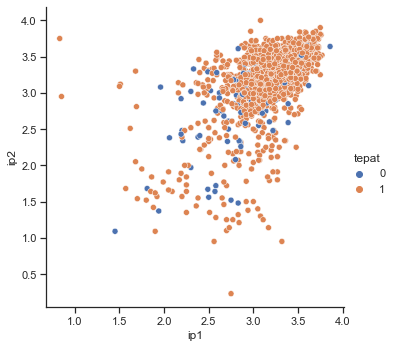

In [109]:
sns.relplot(data=data, x="ip1", y="ip2", hue="tepat")

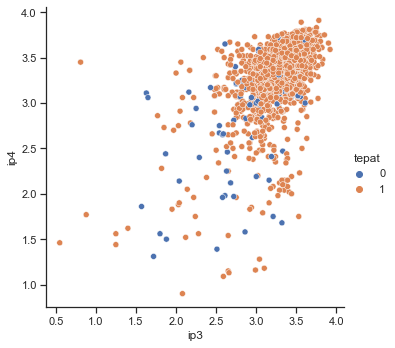

In [110]:
sns.relplot(data=data, x="ip3", y="ip4", hue="tepat")

In [111]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [112]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 0, test_size = 0.33)

In [113]:
classification = svm.SVC(kernel = "rbf", random_state=0)

In [114]:
classification.fit(X_train, Y_train)

C:\Users\LENOVO\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC(random_state=0)

In [115]:
predict = classification.predict(X_test)
test_accuracy_score = accuracy_score(predict, Y_test)

In [116]:
test_accuracy_score

0.9138240574506283

In [117]:
ip1 = input("GPA from semester 1: ")
ip2 = input("GPA from semester 2: ")
ip3 = input("GPA from semester 3: ")
ip4 = input("GPA from semester 4: ")


In [118]:
print("GPA from semester 1: ", ip1, "\nGPA from semester 2: ", ip2, "\nGPA from semester 3: ", ip3, "\nGPA from semester 4: ", ip4)

GPA from semester 1:  2.2 
GPA from semester 2:  1.8 
GPA from semester 3:  2.4 
GPA from semester 4:  1.4


In [119]:
input_data1 = (ip1, ip2, ip3, ip4)

#Changing Input Data As Numpy Array
input_data_array = np.asarray(input_data1)

# Reshape the data as we are predicting for only one instance
input_data_reshape = input_data_array.reshape(1,-1)

# Prediction
prediction = classification.predict(input_data_reshape)
#print(prediction)

if prediction == 0:
    print('Fail a class')
else:
    print('Pass a class')

Pass a class


In [120]:
prediction

array([1])